In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib widget

def extract_from_txt(file_path, labels, delimiter='\n'):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data_dict = {label: [] for label in labels}
    last_delimiter_index = 0
    messages = []
    for i in range(len(lines)):
        if(lines[i].startswith(delimiter)):
            messages.append(lines[last_delimiter_index:i])
            last_delimiter_index = i
    for message in messages:
        message_dict = {label: [] for label in labels}
        for label in labels:
            for line in message:
                    if(line.startswith(label)):
                        message_dict[label].append(float(line.split(':')[1]))
        full = True
        for key in message_dict:
            if(len(message_dict[key]) == 0):
                full=False
                break
        if(full):
            for label in labels:
                data_dict[label].append(message_dict[label][0])

    # for series in data_dict:
    #     print(series, len(data_dict[series]))

    df_raw = pd.DataFrame(data_dict)
    return df_raw

def remove_even_lines(input_file_path, output_file_path):
    with open(input_file_path, 'r') as file:
        lines = file.readlines()
    
    with open(output_file_path, 'w') as file:
        for i, line in enumerate(lines):
            if i % 2 == 0:
                file.write(line)

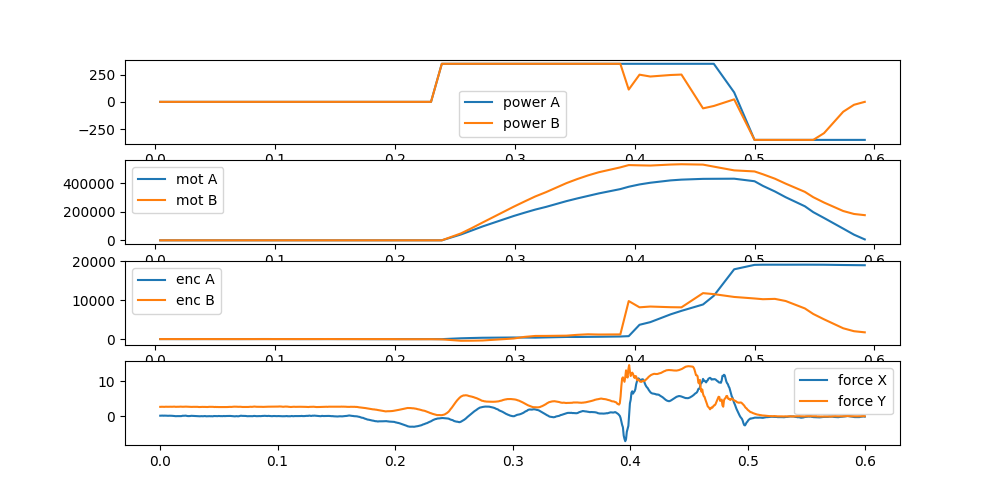

In [7]:
brain_data_path = "./brain_data/2024-07-27_22-34-11_encoder.txt"
force_data_unfilt_path = "./force_data/2024-07-27_22-35-21_force.txt" #every other line is empty

df_log = extract_from_txt(
    brain_data_path, 
    [
        't',
        'pA',
        'pB',
        'mA',
        'mB',
        'eA', 
        'eB', 
        'I'
    ],
    '#'
)

force_data_path = force_data_unfilt_path[:-4] + '_filt.txt'
remove_even_lines(force_data_unfilt_path, force_data_path)
df_force = extract_from_txt(
    force_data_path, 
    [
        'elapsed',
        'looptime',
        'N23', 
        'N67'
    ],
    '\n'
)

#set starttime and offset to 0 and period to very high number at first
starttime = 13.6
offset = 80.95
period = 0.6

df_log.loc[:,'t'] = df_log.loc[:,'t'] / 1e3 - starttime - offset
df_log = df_log[df_log['t'] > 0]
df_log = df_log[df_log['t'] < period]
df_log = df_log.reset_index()


df_force.loc[:,'t'] = np.cumsum(df_force['looptime']) / 1e6 - starttime
df_force['Fx'] = -df_force['N23']
df_force['Fy'] = df_force['N67']
df_force = df_force[df_force['t'] > 0]
df_force = df_force[df_force['t'] < period]
df_force = df_force.reset_index()



fig, axs = plt.subplots(4,1,figsize=(10,5))
axs[0].plot(df_log['t'], -df_log['pA'], label='power A')
axs[0].plot(df_log['t'], -df_log['pB'], label='power B')
axs[1].plot(df_log['t'], -(df_log['mA']-df_log['mA'][0]), label='mot A')
axs[1].plot(df_log['t'], -(df_log['mB']-df_log['mB'][0]), label='mot B')
axs[2].plot(df_log['t'], df_log['eA']-df_log['eA'][0], label='enc A')
axs[2].plot(df_log['t'], df_log['eB']-df_log['eB'][0], label='enc B')
axs[3].plot(df_force['t'], df_force['Fx'], label='force X')
axs[3].plot(df_force['t'], df_force['Fy'], label='force Y')
for ax in axs:
    ax.legend()


Text(0, 0.5, 'Current (A)')

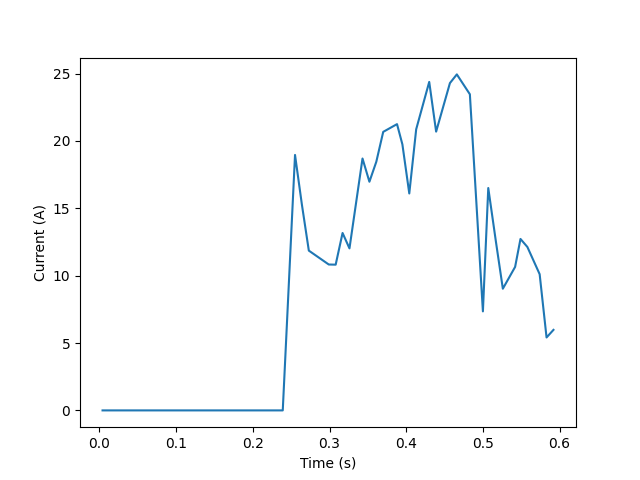

In [3]:
plt.figure()
plt.plot(df_log['t'], df_log['I']/1000)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')

In [4]:
# starttime = 137.2
starttime = 6.4
period = 0.5
# period = 1


# df_force.plot('elapsed', 'N23', 'N67')
# df_force.plot('elapsed', 'N67')

dt = 0.662
elapsed = np.arange(0, dt*len(df_force[f'N23']), dt)/1000 - starttime
df_force.loc[:,'t'] = elapsed
df_force['Fx'] = -df_force['N23'] + 0.25
df_force['Fy'] = df_force['N67'] + 0.5
df_force = df_force[df_force['t'] > 0]
df_force = df_force[df_force['t'] < period]
df_force = df_force.reset_index()

plt.figure()
plt.plot(df_force['t'], df_force['N23'])
plt.plot(df_force['t'], df_force['N67'])

ValueError: Must have equal len keys and value when setting with an iterable

/var/folders/fm/j5zsv9x1121cqbb30njg041r0000gn/T/ipykernel_46754/2846041122.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


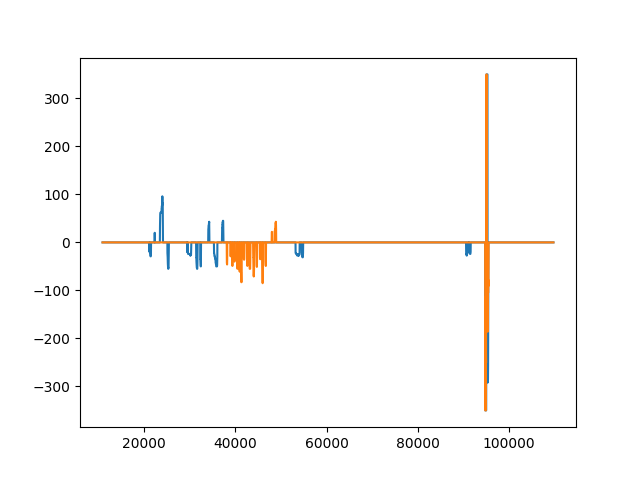

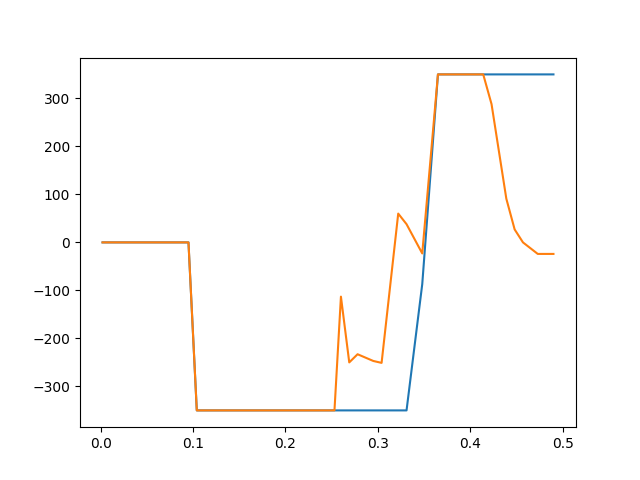

In [ ]:
offset = -77.4

df_log = extract_from_txt(
    "./brain_data/2024-07-27_22-34-11_encoder.txt", 
    [
        't',
        'pA',
        'pB',
        'mA',
        'mB',
        'eA', 
        'eB', 
        'I'
    ],
    '#'
)
plt.figure()
plt.plot(df_log['t'], df_log['pA'])
plt.plot(df_log['t'], df_log['pB'])

df_log.loc[:,'t'] = (df_log['t'] - df_log['t'][0])/1000 -starttime + offset
# df_log.loc[:,'t'] = (df_log['t'])/1000 -starttime + offset
df_log = df_log[df_log['t'] > 0]
df_log = df_log[df_log['t'] < period]
df_log = df_log.reset_index()

plt.figure()
plt.plot(df_log['t'], df_log['pA'])
plt.plot(df_log['t'], df_log['pB'])

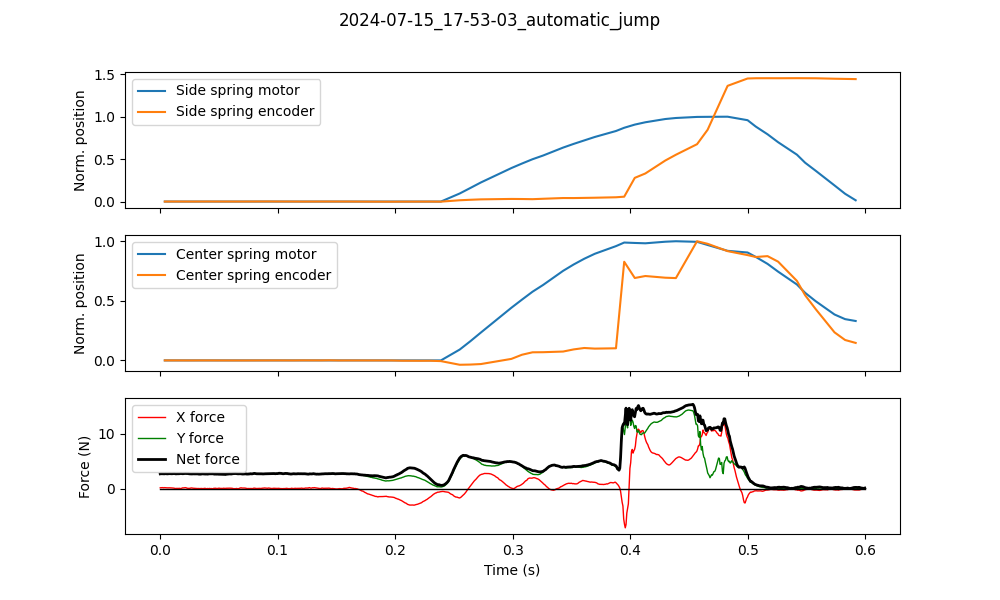

In [5]:



plt.close('all')

vlines = [0.208, 0.2418, 0.35]



fig, axs = plt.subplots(3, 1, figsize=(10,6), sharex=True)
# fig.tight_layout()
fig.suptitle("2024-07-15_17-53-03_automatic_jump")

axs[0].plot(df_log['t'], -(df_log['mA'] - df_log['mA'][0])/max(abs(df_log['mA'] - df_log['mA'][0])), '-', label='Side spring motor')
axs[0].plot(df_log['t'], (df_log['eA'] - df_log['eA'][0])/max(abs(df_log['eA'])), '-', label='Side spring encoder')
# axs[0].axvline(x=vlines[1], color='k', linestyle='--')
axs[0].set_ylabel('Norm. position')

axs[1].plot(df_log['t'], -(df_log['mB'] - df_log['mB'][0])/max(abs(df_log['mB'] - df_log['mB'][0])), '-', label='Center spring motor')
axs[1].plot(df_log['t'], (df_log['eB'] - df_log['eB'][0])/max(abs(df_log['eB'] - df_log['eB'][0])), '-', label='Center spring encoder')
# axs[1].axvline(x=vlines[0], color='k', linestyle='--')
axs[1].set_ylabel('Norm. position')

axs[2].plot(df_force['t'], df_force['Fx'], 'r', label='X force', linewidth=1)
axs[2].plot(df_force['t'], df_force['Fy'], 'g', label='Y force', linewidth=1)
axs[2].plot(df_force['t'], np.sqrt(df_force['Fx']**2 + df_force['Fy']**2), 'black', label='Net force', linewidth=2)
axs[2].set_ylabel('Force (N)')
axs[2].set_xlabel("Time (s)")

axs[2].plot(df_force['t'], np.zeros_like(df_force['t']), 'k', linewidth=1)


# for vline in vlines:
#     axs[2].axvline(x=vline, color='k', linestyle='--')

for ax in axs:
    ax.legend(loc='upper left')


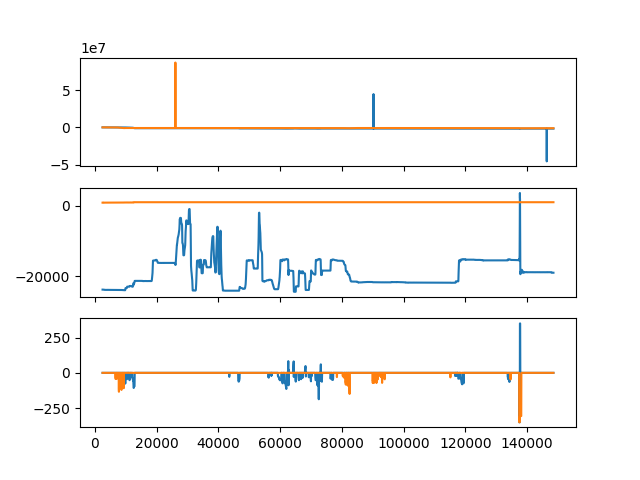

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(df_log['t'], df_log['mA'])
ax1.plot(df_log['t'], df_log['mB'])

ax2.plot(df_log['t'], df_log['eA'])
ax2.plot(df_log['t'], df_log['eB'])

# plt.figure()
ax3.plot(df_log['t'], df_log['pA'])
ax3.plot(df_log['t'], df_log['pB'])

In [ ]:
df_force

,index,elapsed,N23,N67,t,Fx,Fy
0,111783,2338823.0,-0.062417,2.961997,0.000346,-0.062417,2.961997
1,111784,2338824.0,-0.066377,2.962298,0.001008,-0.066377,2.962298
2,111785,2338825.0,-0.067654,2.962704,0.001670,-0.067654,2.962704
3,111786,2338825.0,-0.067604,2.964966,0.002332,-0.067604,2.964966
4,111787,2338826.0,-0.066434,2.966647,0.002994,-0.066434,2.966647
...,...,...,...,...,...,...,...
1506,113289,2339820.0,0.019006,-0.060929,0.997318,0.019006,-0.060929
1507,113290,2339821.0,0.020396,-0.060055,0.997980,0.020396,-0.060055
1508,113291,2339822.0,0.021182,-0.055976,0.998642,0.021182,-0.055976
1509,113292,2339822.0,0.021804,-0.049699,0.999304,0.021804,-0.049699


In [ ]:
plt.close('all')